# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate performance 

## Boston Housing dataset - again! 

The dataset is available in the file `'boston.csv'`. 

- Import the dataset and print its `.head()` and dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset 
data = pd.read_csv('boston.csv')

# Print the first five rows 
print(data.head())

# Print the dimensions of data
print(data.shape)

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
(506, 15)


## Identify features and target data 

In this lab, we will use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`: 

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor) 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood 

#### Target
- `MEDV`',the median value of the home 

- Create DataFrames for features and target as shown above 
- Inspect the contents for validity 

In [6]:
# Features and target data
target = data['medv']
features = data[['rm', 'lstat', 'ptratio']]
print(target.head())
features.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Inspect correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

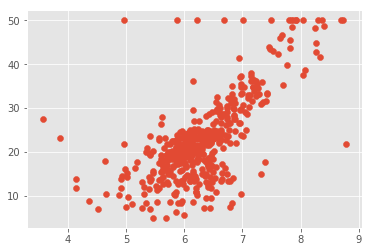

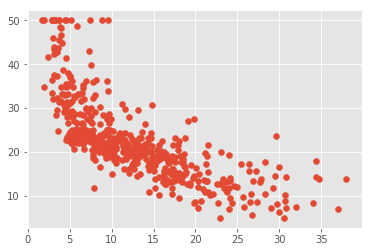

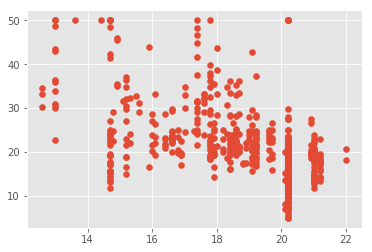

In [7]:
# Your code here 
for col in features.columns:
    plt.scatter(features[col], target, label=col)
    plt.show()

It looks like there is some correlation in the first and second plots. The third plot shows very little correlation

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal sized arrays for the given true and predicted values 

In [8]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    
    return r2, mse


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

(0.9228556485355649, 0.4719999999999998)

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [11]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [13]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.47097115950374013, 38.795686274509805]  - R2, MSE

(0.47097115950374013, 38.795686274509805)

## Hyperparameter tuning (I)

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs 
- Comment on the output 

max_depth 1 r2 0.3602156982888397 mse 46.91780325106487
max_depth 2 r2 0.645549571073612 mse 25.9931908959712
max_depth 3 r2 0.6679219352208099 mse 24.35254079481681
max_depth 4 r2 0.7226546855127474 mse 20.338781153139767
max_depth 5 r2 0.746527856459061 mse 18.588071211613478
max_depth 6 r2 0.7515894043185498 mse 18.216888758430127
max_depth 7 r2 0.6263488910856303 mse 27.401249398740603
max_depth 8 r2 0.6555843678227183 mse 25.257301287114323
max_depth 9 r2 0.6240595926464088 mse 27.56913231407174
max_depth 10 r2 0.6113026664935214 mse 28.50464597035984
max_depth 11 r2 0.6134488068311303 mse 28.347261380210004
max_depth 12 r2 0.6098721144721015 mse 28.609553762098198
max_depth 13 r2 0.49127115931037457 mse 37.307010490535475
max_depth 14 r2 0.48288911786867383 mse 37.921697300062
max_depth 15 r2 0.4820091115502495 mse 37.986231492597035
max_depth 16 r2 0.6295779113752684 mse 27.164453124999998
max_depth 17 r2 0.607716443497591 mse 28.767637269907965
max_depth 18 r2 0.614582652327584

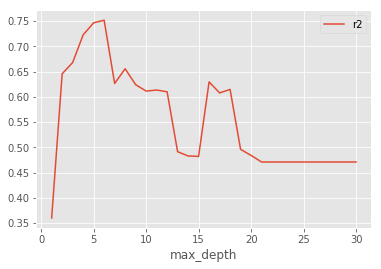

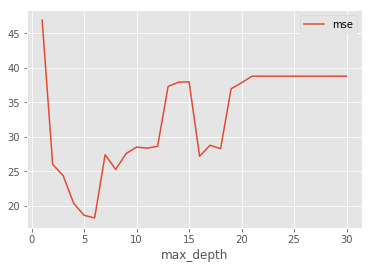

In [17]:
# Your code here 
runs_depth = []
runs_r2 = []
runs_mse = []
for depth in range(1,31):
    # create model
    model = DecisionTreeRegressor(max_depth=depth, random_state=45)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = performance(y_test, y_pred)
    # record data
    print('max_depth', depth, 'r2', score[0], 'mse', score[1])
    runs_depth.append(depth)
    runs_r2.append(score[0])
    runs_mse.append(score[1])

# plotting
plt.plot(runs_depth, runs_r2, label='r2')
plt.xlabel('max_depth')
plt.legend()
plt.show()

plt.plot(runs_depth, runs_mse, label='mse')
plt.xlabel('max_depth')
plt.legend()
plt.show()

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

min_samples 2 r2 0.47097115950374013 mse 38.795686274509805
min_samples 3 r2 0.4803952327124762 mse 38.104583333333345
min_samples 4 r2 0.5247289625517133 mse 34.85342320261439
min_samples 5 r2 0.6473458760458828 mse 25.86146105664488
min_samples 6 r2 0.6439721500825788 mse 26.108869144880178
min_samples 7 r2 0.6449886749672344 mse 26.03432352941177
min_samples 8 r2 0.6403227207405336 mse 26.37649560490863
min_samples 9 r2 0.64204832172797 mse 26.24995075627473
min_samples 10 r2 0.5191660060438964 mse 35.26137584888894


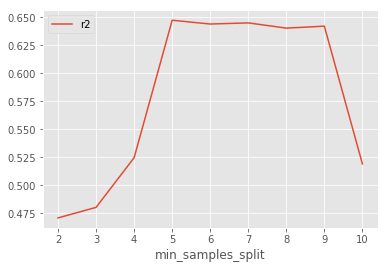

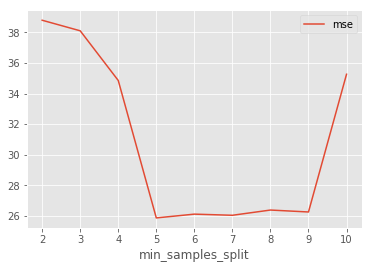

In [21]:
# Your code here 
# Your code here 
runs_min_samples = []
runs_r2 = []
runs_mse = []
for split in range(2, 11):
    # create model
    model = DecisionTreeRegressor(min_samples_split=split, random_state=45)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = performance(y_test, y_pred)
    # record data
    print('min_samples', split, 'r2', score[0], 'mse', score[1])
    runs_min_samples.append(split)
    runs_r2.append(score[0])
    runs_mse.append(score[1])
    
plt.plot(runs_min_samples, runs_r2, label='r2')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()

plt.plot(runs_min_samples, runs_mse, label='mse')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [22]:
# Your code here 
model = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=45)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(performance(y_test, y_pred))

(0.7515894043185498, 18.216888758430127)


In [23]:
# these results are much better than the vanilla model

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like max-features to find the optimal version of the model 

## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 